**David Devadze**<br>
**Artificial Inteligence (CS550)**

Title: **Homework №3**
<br>
Deadline: **8 May 2020**

Homework will be evaluated maximum by **6 points**.
Each problem is **one point**. 

<h3 align="center">Problem 1: Vandermonde Matrix</h3>

In linear algebra, a **Vandermonde matrix**, is a an $m \times n$ matrix with the terms of a geometric progression in each row

$$
V = 
\begin{bmatrix}
1      & \alpha_1 & \alpha_1^2 & \cdots & \alpha_1^n\\ 
1      & \alpha_2 & \alpha_2^2 & \cdots & \alpha_2^n\\ 
1      & \alpha_3 & \alpha_2^2 & \cdots & \alpha_3^n\\ 
\vdots & \vdots   & \vdots     & \ddots & \alpha_4^n\\ 
1      & \alpha_m & \alpha_m^2 & \cdots & \alpha_5^n
\end{bmatrix}.$$

(a) Derive the expression for the **determinant** of the **square Vandermonde matrix** (where $m = n$):

$$det(V) = \prod_{1 \leq i < j \leq n} (\alpha_i - \alpha_j).$$

(b) Write **python code** that demonstrates that **it is not possible to compute the inverse Vandermonde matrix**.

$$
V=\begin{bmatrix}1&x_1&x_1^2&...&x_1^{n-2}&x_1^{n-1}\\ 1&x_2&x_2^2&...&x_1^{n-2}&x_2^{n-1}\\ 1&x_3&x_3^2&...&x_3^{n-2}&x_3^{n-1}\\ ...&...&...&...&...&...\\ 1&x_{n-1}&x_{n-1}^2&...&x_{n-1}^{n-2}&x_{n-1}^{n-1}\\ 1&x_n&x_n^2&...&x_n^{n-2}&x_n^{n-1}\end{bmatrix}
$$
By subtracting row 1 from each of the other rows Vn won't change:
$$
V=\begin{bmatrix}1&x_1&x_1^2&...&x_1^{n-2}&x_1^{n-1}\\ 1&x_2-x_1&x_2^2-x_1^2&...&x_1^{n-2}-x_1^{n-2}&x_2^{n-1}-x_1^{n-1}\\ 1&x_3-x_1&x_3^2-x_1^2&...&x_3^{n-2}-x_1^{n-2}&x_3^{n-1}-x_1^{n-1}\\ ...&...&...&...&...&...\\ 1&x_{n-1}-x_1&x_{n-1}^2-x_1^2&...&x_{n-1}^{n-2}-x_1^{n-2}&x_{n-1}^{n-1}-x_1^{n-1}\\ 1&x_n-x_1&x_n^2-x_1^2&...&x_n^{n-2}-x_1^{n-2}&x_n^{n-1}-x_1^{n-1}\end{bmatrix}
$$
Also without changing V, we can get new elements $a_{ij}=\left(x_i^{j-1}-x_1^{j-1}\right)-\left(x_1x_i^{j-1}-x_1^{j-1}\right)=\left(x_i-x_1\right)x_i^{j-2} $, so V will become:
$$
\begin{bmatrix}1&0&0&0&0&0\\ 0&x_2-x_1&\left(x_2-x_1\right)x_2&...&\left(x_2-x_1\right)x_2^{n-3}&\left(x_2-x_1\right)x_2^{n-2}\\ 0&x_3-x_1&\left(x_3-x_1\right)x_3&...&\left(x_3-x_1\right)x_3^{n-3}&\left(x_3-x_1\right)x_3^{n-2}\\ 0&...&...&...&...&...\\ 0&x_{n-1}-x_1&\left(x_{n-1}-x_1\right)x_{n-1}&...&\left(x_{n-1}-x_1\right)x_{n-1}^{n-3}&\left(x_{n-1}-x_1\right)x_{n-1}^{n-2}\\ 0&x_n-x_1&\left(x_n-x_1\right)x_n&...&\left(x_n-x_1\right)x_n^{n-3}&\left(x_n-x_1\right)x_n^{n-2}\end{bmatrix}
$$
As we can see every kth row expect from first, has the constant $(x_k−x_1)$. We can take it out from matrix, we will get
$$
\prod _{k=2}^n\left(x_k-x_1\right)\begin{bmatrix}1&0&0&0&0&0\\ 0&1&x_2&...&x_2^{n-3}&x_2^{n-2}\\ 0&1&x_3&...&x_3^{n-3}&x_3^{n-2}\\ ...&...&...&...&...&...\\ 0&1&x_{n-1}&...&x_{n-1}^{n-3}&x_{n-1}^{n-2}\\ 0&1&x_n&...&x_n^{n-3}&x_n^{n-2}\end{bmatrix}
$$
Which is same as
$$
\prod _{k=2}^n\left(x_k-x_1\right)\begin{bmatrix}1&x_2&...&x_2^{n-3}&x_2^{n-2}\\ 1&x_3&...&x_3^{n-3}&x_3^{n-2}\\ ...&...&...&...&...\\ 1&x_{n-1}&...&x_{n-1}^{n-3}&x_{n-1}^{n-2}\\ 1&x_n&...&x_n^{n-3}&x_n^{n-2}\end{bmatrix}
$$
So $V_n=\prod _{k=2}^n\left(x_k-x_1\right) \cdot V_{n-1}$
So at the end wi will get $det(V) = \prod_{1 \leq i < j \leq n} (\alpha_i - \alpha_j).$

In [127]:
# Cause of so many multiplications determinant overflows, becomes either 0 or +-infinity
import random
import numpy as np
print('Cases on "big" numbers')
for case in range(1,6):
    print('Case',case)
    print('Determinant on certain step:')
    N = 30
    x = random.sample(range(1, 100), N)
    vander = np.vander(x, N,increasing=True)
    det = 1.0
    for a in range(0,N):
        for b in range(a+1,N):
            det = det * (vander[b][1] - vander[a][1])
        print(det)
        if(det == float("inf") or det == float("-inf")):
            break
print('Cases on "small" numbers')
for case in range(1,6):
    print('Case',case)
    print('Determinant on certain step:')
    N = 30
    x = np.random.uniform(0.01, 0.1, [N])
    vander = np.vander(x, N,increasing=True)
    det = 1.0
    for a in range(0,N):
        for b in range(a+1,N):
            det = det * (vander[b][1] - vander[a][1])
        print(det)
        if(det == 0):
            break

Cases on "big" numbers
Case 1
Determinant on certain step:
-1.2710810213827213e+38
4.789581293230789e+77
2.0654230597989853e+116
-1.1433341443619303e+149
-1.9400303567760297e+185
1.7782565725297902e+219
-1.7287243060713853e+246
2.0094670516019261e+279
3.923725747377613e+305
inf
Case 2
Determinant on certain step:
-1.2114149009061133e+41
-4.6475901480251266e+76
9.86567150611944e+117
2.3725556846214134e+153
6.868692897883412e+186
-5.077874813273758e+222
-5.3876775204145025e+259
5.288478214237654e+288
inf
Case 3
Determinant on certain step:
-1.0836692919240204e+41
-7.771754746617252e+80
6.849216904652041e+116
1.5741384375168879e+155
-1.880790932678108e+189
1.0340470778658382e+220
1.841039791188652e+251
2.3748704735687694e+285
inf
Case 4
Determinant on certain step:
3.474442453537716e+39
1.5315383162410981e+81
-2.546007771613216e+118
4.9311116614110287e+151
-1.0045401883871293e+188
2.532751713267422e+220
3.9650041171327535e+250
1.0035555954702346e+281
-4.47543016044465e+306
inf
Case 5
Dete

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  


<h3 align="center">Problem 2: Bias–Variance Decomposition</h3>

Derive the expression for the **bias–variance decomposition** for **squared error proceeds**:

$$\mathbf{E} \left [\left(f(x_0) - \hat{f}(x_0)\right)^2\right]
= \left(\operatorname{Bias}\left[\hat{f}(x_0)\right] \right) ^2 + \operatorname{Var}\left[\hat{f}(x_0)\right] + \sigma^2,$$

where 

$$\operatorname{Bias}(\hat{f}(x_0))=f(x_0)-\mathbf{E}\left [\hat{f}(x_0) \right ]$$

and

$$\operatorname{Var}(\hat{f}(x_0))=\mathbf{E}\left [ \left(\hat{f}(x_0)-\mathbf{E} \left[\hat{f}(x_0)\right] \right)^2 \right].$$

$$
E\left[\left(f\left(x_0\right)-\overline{f}\left(x_0\right)\right)^2\right]=E\left[\left(\left(f\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)-\left(\overline{f}\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)\right)^2\right]=E\left[\left(\left(f\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)-\left(\overline{f}\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)\right)^2\right]=E\left[\left(\left(f\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)^2-2\left(f\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]\right)\left(\overline{f}\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]^2\right)+\:\left(\overline{f}\left(x_0\right)-E\left[\overline{f}\left(x_0\right)\right]^2\right)\right)\right]=E\left[\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right]-E\left[2\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)\left(\overline{f}\left(x_0\right)-E\overline{f}\left(x_0\right)\right)\right]+E\left[\left(\overline{f}\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right]
$$
$$
E\left[2\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)\left(\overline{f}\left(x_0\right)-E\overline{f}\left(x_0\right)\right)\right]=2\left(E\left(f\left(x_0\right)\right)-E\left(\overline{f}\left(x_0\right)\right)\right)\left(E\left(\overline{f}\left(x_0\right)\right)-E\left(\overline{f}\left(x_0\right)\right)\right)=0
$$
$$
E\left[\left(f\left(x_0\right)-\overline{f}\left(x_0\right)\right)^2\right]=E\left[\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right]+E\left[\left(\overline{f}\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right]=E\left[\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right]+\operatorname{Var}(\hat{f}(x_0))
$$
$$
E\left[\left(f\left(x_0\right)-E\overline{f}\left(x_0\right)\right)^2\right] = E\left[\left(\left(f\left(x_0\right)-E\left[f\left(x_0\right)\right]\right)+\left(E\left[f\left(x_0\right)\right]-E\overline{f}\left(x_0\right)\right)\right)^2\right]=E\left[\left(\left(f\left(x_0\right)-E\left[f\left(x_0\right)\right]\right)+\left(E\left[f\left(x_0\right)\right]-E\overline{f}\left(x_0\right)\right)\right)^2\right]=E\left[\left(\left(f\left(x_0\right)-E\left[f\left(x_0\right)\right]\right)^2+2\left(f\left(x_0\right)-E\left[f\left(x_0\right)\right]\right)\left(E\left[f\left(x_0\right)\right]-E\overline{f}\left(x_0\right)\right)+\left(E\left[f\left(x_0\right)\right]-E\overline{f}\left(x_0\right)\right)^2\right)\right]= E\left[\left(f\left(x_0\right)-E\left[f\left(x_0\right)\right]\right)^2\right]+E\left[\left(E\left[f\left(x_0\right)\right]-E\left[\overline{f}\left(x_0\right)\right]\right)^2\right]
$$
$$
\mathbf{E} \left [\left(f(x_0) - \hat{f}(x_0)\right)^2\right]
= \left(\operatorname{Bias}\left[\hat{f}(x_0)\right] \right) ^2 + \operatorname{Var}\left[\hat{f}(x_0)\right] + E\left[\left(E\left[f\left(x_0\right)\right]-E\left[\overline{f}\left(x_0\right)\right]\right)^2\right]
$$
$$
E\left[\left(E\left[f\left(x_0\right)\right]-E\left[\overline{f}\left(x_0\right)\right]\right)^2\right] = NOISE
$$
$$
\mathbf{E} \left [\left(f(x_0) - \hat{f}(x_0)\right)^2\right]
= \left(\operatorname{Bias}\left[\hat{f}(x_0)\right] \right) ^2 + \operatorname{Var}\left[\hat{f}(x_0)\right] + \sigma^2
$$


<h3 align="center">Problem 3: Iris Flower Dataset Classfication using Naive Bayes</h3>

The **Iris flower data** set or **Fisher's Iris data set** is a multivariate data set introduced by the British statistician and biologist **Ronald Fisher** in his **1936**.

The data set consists of **50 samples** from each of **three species** of Iris: **Iris setosa**, **Iris virginica** and **Iris versicolor**.

<img src="Data/Iris_Flowers.png" width="512" height="512" alt="Example" />


**Four features** were measured from each sample: the **length** and the **width** of the **sepals** and **petals**, in **centimeters**. 

Based on the combination of these four features, **Fisher developed a linear discriminant model** to **distinguish the species from each other**.

**Problem stetament**: using the **Iris datasetand** implement a **Gaussian Naive Bayes classifier**.

**Note**: You can use any of **pandas**, **numpy** and **scipy.stats** libraries. It's up to you.
**Note**: The decision boundaries must be plotted.

In [1]:
from urllib.request import urlretrieve
import pandas as pd
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


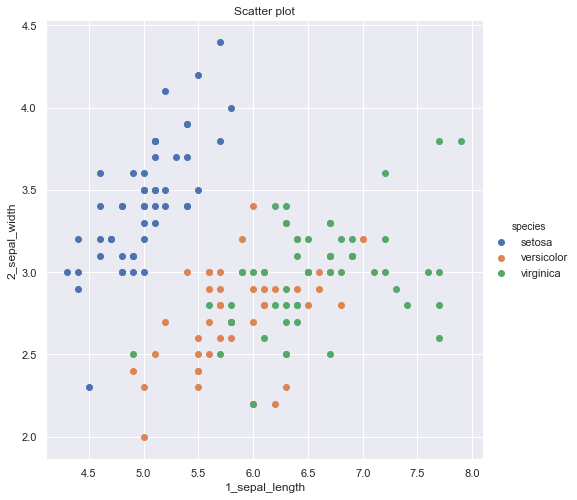

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

sns.set()

#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

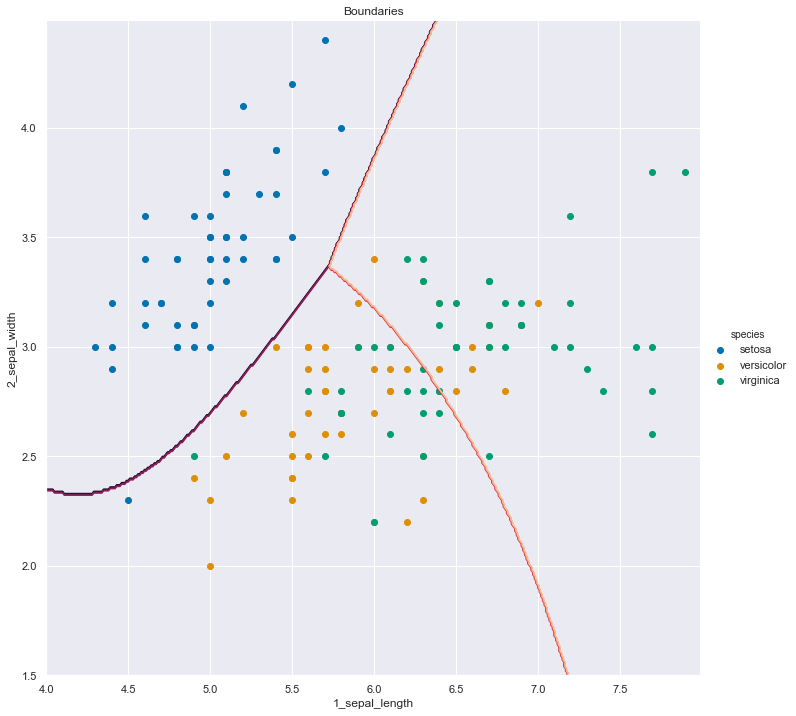

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

sns.set()

iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
X = iris.iloc[:,0:2]
y = iris.iloc[:,4].replace({'setosa':1, 'versicolor':2, 'virginica':3})

clf = GaussianNB()
clf.fit(X, y)

grid = sns.FacetGrid(iris, hue="species", height = 10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()


x_min, x_max = 4, 8
y_min, y_max = 1.5, 4.5
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01),
                     np.arange(y_min, y_max,0.01))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

grid.ax.contour(xx, yy, Z)
plt.title('Boundaries')
plt.show()


<h3 align="center">Problem 4: Logistic Sigmoid Function VS Hyperbolic Tangent Function</h3>

(a) Show that the **hyperbolic tangent function**:

$$ \tanh{a} = \frac{\sinh{a}}{\cosh{a}} = \frac{e^a - e^{-a}}{e^a + e^{-a}}$$

&emsp; and the **logistic sigmoid function**:

  $$\sigma(a) = \frac{1}{1 + e^{-a}}$$

&emsp; are related by:

$$\tanh{(a)} = 2\sigma(2a) - 1.$$



(b) Show that a **general linear combination of logistic sigmoid functions** of the form:

$$y(x, \mathbf{w}) = w_0 + \sum_{j=1}^{M} w_j \sigma \left ( \frac{x - \mu_j}{s} \right )$$

&emsp; is equivalent to a **linear combination of tanh functions** of the form:

$$y(x, \mathbf{u}) = u_0 + \sum_{j=1}^{M} u_j \tanh{ \left ( \frac{x - \mu_j}{s} \right )}$$

&emsp; and find expressions to relate the new parameters $\{u_1, ..., u_M\}$ to the original parameters $\{w_1, ..., w_M\}$.

$$
2\sigma \left(2a\right)-1=\frac{2}{1+e^{-2a}}-1=\frac{1-e^{-2a}}{1+e^{-2a}}=\frac{e^a-e^{-a}}{e^a+e^{-a}}
$$

$$
y(x, \mathbf{w}) = w_0 + \sum_{j=1}^{M} w_j \sigma \left ( \frac{x - \mu_j}{s} \right )=w_0\:+\:\sum _{j=1}^Mw_j\frac{\:tanh\left(\frac{x-\mu_j}{2s}\right)+1}{2}=w_0\:+\:\sum _{j=1}^M\left(\frac{w_j\cdot tanh\left(\frac{x-\mu_j}{2s}\right)}{2}+\frac{\:w_j}{2}\right)=w_0\:+\sum \:_{j=1}^M\frac{\:w_j}{2}+\:\sum _{j=1}^M\frac{w_j}{2}tanh\left(\frac{x-\mu_j}{2s}\right)
$$
$$
u_0 = w_0\:+\sum \:_{j=1}^M\frac{\:w_j}{2}
$$
$$
u_j = \frac{w_j}{2}
$$

<h3 align="center">Problem 5: The Derivative of the Error Function for the Logistic Regression Model</h3>

By making use of the **derivative** of the **logistic sigmoid function**:

$$\frac{d\sigma}{da} = \sigma(1 - \sigma),$$

show that the **derivative** of the **error function for the logistic regression model**:

$$E(\mathbf{w}) = - \ln p(\mathbf{t} | \mathbf{w}) = - \sum_{n=1}^{N} (t_n \ln y_n - (1 - t_n) \ln(1 - y_n)),$$

where $y_n = \sigma(a_n)$ and $a_n = \mathbf{w}^{\mathbf{T}} \phi_n$, is given by:

  $$\nabla E(\mathbf{w}) = \sum_{n=1}^{N} (y_n - t_n) \phi_n.$$


$$
\frac{d}{d w} E(w)
=
$$
$$
-\sum_{n=1}^{N} \frac{d}{d w}\left(t_n \ln \sigma(a_n) + (1 - t_n) \ln(1 - \sigma(a_n)) \right)
=
$$
$$
-\sum_{n=1}^{N} \left(\frac{t_n} {\sigma(a_n)}\frac{d \sigma(a_n)}{d w} - \frac{1 - t_n} {1 - \sigma(a_n)} \frac{d \sigma(a_n)}{d w} \right)
=
$$
$$
-\sum_{n=1}^{N} \left(\frac{t_n} {\sigma(a_n)} - \frac{1 - t_n} {1 - \sigma(a_n)} \right) \frac{d \sigma(a_n)}{d w} 
=
$$
$$
-\sum_{n=1}^{N} \frac{t_n - \sigma(a_n)} {\sigma(a_n) (1 - \sigma(a_n))} \frac{d \sigma(a_n)}{d w} 
=
$$
$$
-\sum_{n=1}^{N} \frac{t_n - \sigma(a_n)} {\sigma(a_n) (1 - \sigma(a_n))} \frac{d \sigma(a_n)}{d w} 
=
$$
$$
-\sum_{n=1}^{N} \frac{t_n - \sigma(a_n)} {\sigma(a_n) (1 - \sigma(a_n))} \sigma(a_n)(1 - \sigma(a_n)) \frac{d a_n}{d w}
=
$$
$$
-\sum_{n=1}^{N} \left(t_n - \sigma(a_n) \right)\frac{d a_n}{d w} 
=
$$
$$
-\sum_{n=1}^{N} \left(t_n - \sigma(a_n) \right)\frac{d w^{T} \phi_n}{d w} 
= 
$$
$$
\sum_{n=1}^{N} \left(\sigma(a_n) - t_n \right)\phi_n
=
$$
$$
\sum_{n=1}^{N} \left(y_n - t_n \right)\phi_n
$$

<h3 align="center">Problem 6: The Convex Hull</h3>

Given a set of data points $\{\mathbf{x}_n\}$,  $n = 1, ..., N$, we can define the **convex hull** to be the set of all points $\mathbf{x}$ given by:

$$\mathbf{x} = \sum_{n}^{N} \alpha_n \mathbf{x}_n,$$
    
where $\alpha_n \geq 0$ and $\sum_{n}^{N} \alpha_n = 1$.

Consider a second set of points $\{\mathbf{y}_m\}$, $m = 1, ..., M$, together with their corresponding convex hull.

By definition, the **two sets** of points will be **linearly separable** if there exists a vector $\hat{\mathbf{w}}$ and a scalar $w_0$ such that $\hat{\mathbf{w}} \mathbf{x}_n + w_0 > 0$ for all  $\mathbf{x}_n$ and $\hat{\mathbf{w}} \mathbf{y}_m + w_0 < 0$ for all $\mathbf{y}_m$.

Show that if their **convex hulls intersect**, the two sets of points **cannot be linearly separable**, 
<br>and conversely that if they are **linearly separable**, their **convex hulls do not intersect**.

Let's make an assumption that two sets  x and y are linearly separable and they also intersect.
They intersect means that some point Z is in both x and y, so we can write linear disriminant in 2 different but equal ways:

$$
y\left(z\right)=\sum _n^N\:a_n\left(\overline{w}\cdot z^n+w_0\right)=\sum \:_m^M\:\beta _m\left(\overline{w}\cdot \:z^m+w_0\right)
$$

As we made assumtion they are linearly separable so fow same point T in x and K in y:

$$\hat{\mathbf{w}} \mathbf{z}^n + w_0 > 0$$
$$and$$
$$\hat{\mathbf{w}} \mathbf{z}^m + w_0 < 0$$

As we can see, both of the equations cannot be true. Which means that if two convex hull intersect they cannot be linearly separable and if they are linearly separable they cannot intersect.